# Study of ring systems in the dataset

In [7]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (400, 300)
IPythonConsole.drawOptions.addAtomIndices = True
import pandas as pd

In [2]:
drugs_db_route_merged = pd.read_csv('../data/approved_drugs_final_2022.csv')

In [20]:
# the cook book example
def GetRingSystems(mol, includeSpiro=False):
    ri = mol.GetRingInfo()
    systems = []
    for ring in ri.AtomRings():
        ringAts = set(ring)
        nSystems = []
        for system in systems:
            nInCommon = len(ringAts.intersection(system))
            if nInCommon and (includeSpiro or nInCommon>1):
                ringAts = ringAts.union(system)
            else:
                nSystems.append(system)
        nSystems.append(ringAts)
        systems = nSystems
    return [list(ring_idx) for ring_idx in systems] 

In [25]:
def rings_substructures(ringSys):
    rings_in_molecule = []
    for ring in ringSys:
        substructure_smiles = Chem.MolFragmentToSmiles(m, ring)
        rings_in_molecule.append(substructure_smiles)
    return (rings_in_molecule)

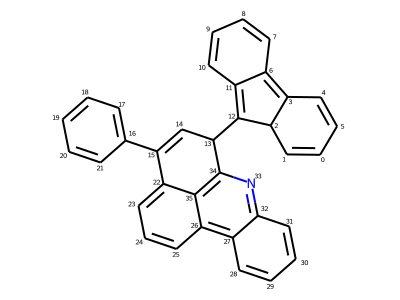

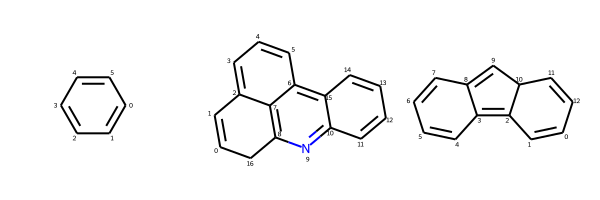

In [26]:
m = Chem.MolFromSmiles('C1=CC2C(C=C1)=c1ccccc1=C2C1C=C(c2ccccc2)c2cccc3c4ccccc4nc1c23')
display(m)

ringSys = GetRingSystems(m)
rings_in_molecule = rings_substructures(ringSys=ringSys)

grid_img = [Chem.MolFromSmiles(x) for x in rings_in_molecule]
Draw.MolsToGridImage(grid_img)
